Regresión Logística - SVM

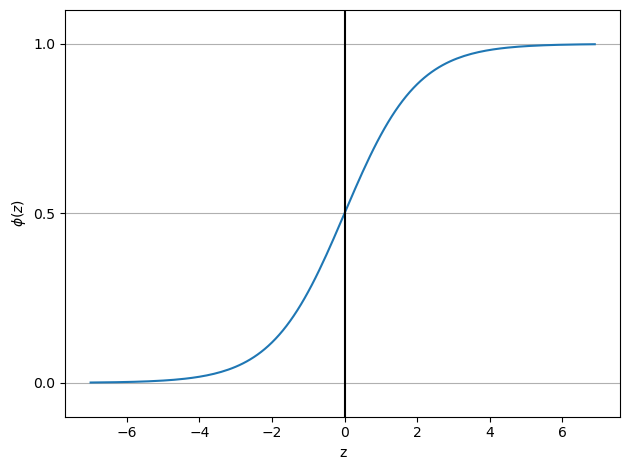

In [2]:
import matplotlib.pyplot as plt
import numpy as np

def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

z = np.arange(-7, 7, 0.1)
phi_z = sigmoid(z)

plt.plot(z, phi_z)
plt.axvline(0.0, color='k')
plt.ylim(-0.1, 1.1)
plt.xlabel('z')
plt.ylabel('$\phi (z)$')

plt.yticks([0.0, 0.5, 1.0])
ax = plt.gca()
ax.yaxis.grid(True)

plt.tight_layout()
#plt.savefig('images/03_02.png', dpi=300)
plt.show()


Implementación de Regresión Logística con Python

In [3]:
class LogisticRegressionGD(object):

    def __init__(self, eta=0.05, n_iter=100, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)#calculo del error
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()

            cost = -y.dot(np.log(output)) - ((1 - y).dot(np.log(1 - output)))#np.log logaritmo natural
            self.cost_.append(cost)
        return self
    
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, z):
        return 1. / (1. + np.exp(-np.clip(z, -250, 250)))

    def predict(self, X):
        return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)



In [4]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

print('Etiquetas de Clase:', np.unique(y))


Etiquetas de Clase: [0 1 2]


In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

print('Cantidad de etiquetas en y:', np.bincount(y))
print('Cantidad de etiquetas en y_train:', np.bincount(y_train))
print('Cantidad de etiquetas en y_test:', np.bincount(y_test))

Cantidad de etiquetas en y: [50 50 50]
Cantidad de etiquetas en y_train: [35 35 35]
Cantidad de etiquetas en y_test: [15 15 15]


In [6]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)

X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)


In [7]:
%matplotlib inline
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))

    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],y=X[y == cl, 1],alpha=0.8,c=colors[idx], marker=markers[idx],label=cl,edgecolor='black')

    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0],X_test[:, 1],edgecolor='black', alpha=1.0,linewidth=1,marker='o',s=100, label='test set')

C:\Users\cmoya\AppData\Local\Temp\ipykernel_13892\1335193270.py:21: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],y=X[y == cl, 1],alpha=0.8,c=colors[idx], marker=markers[idx],label=cl,edgecolor='black')


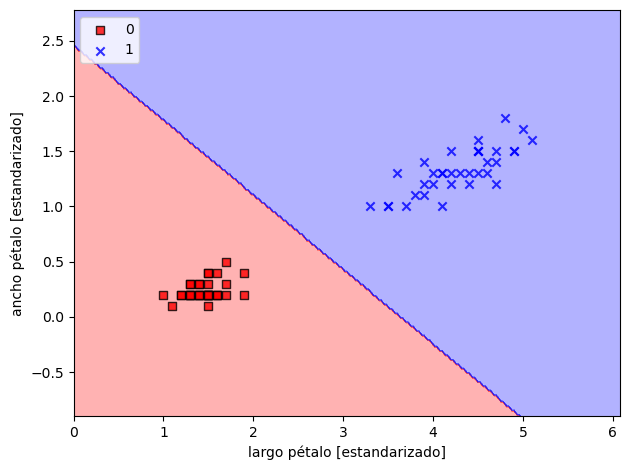

In [8]:
X_train_01_subset = X_train[(y_train == 0) | (y_train == 1)]
y_train_01_subset = y_train[(y_train == 0) | (y_train == 1)]

lrgd = LogisticRegressionGD(eta=0.05, n_iter=1000, random_state=1)
lrgd.fit(X_train_01_subset,y_train_01_subset)

plot_decision_regions(X=X_train_01_subset, y=y_train_01_subset,classifier=lrgd)

plt.xlabel('largo pétalo [estandarizado]')
plt.ylabel('ancho pétalo [estandarizado]')
plt.legend(loc='upper left')

plt.tight_layout()
#plt.savefig('images/03_05.png', dpi=300)

plt.show()


Regresión logística con Scikit-learn

C:\Users\cmoya\AppData\Local\Temp\ipykernel_13892\1335193270.py:21: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],y=X[y == cl, 1],alpha=0.8,c=colors[idx], marker=markers[idx],label=cl,edgecolor='black')


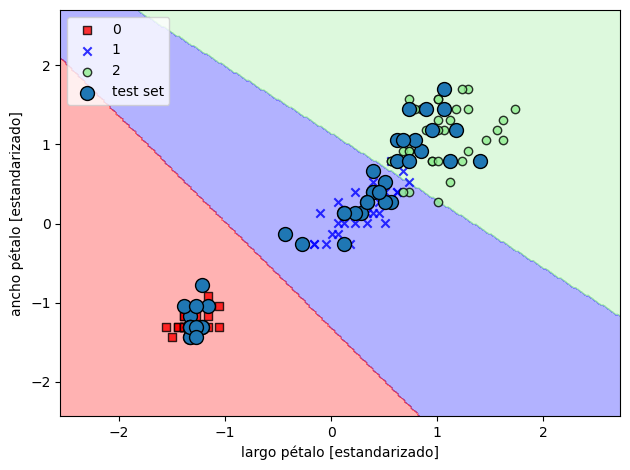

In [9]:
from sklearn.linear_model import LogisticRegression

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

lr = LogisticRegression(C=1.0, random_state=1)
lr.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined,classifier=lr, test_idx=range(105, 150))

plt.xlabel('largo pétalo [estandarizado]')
plt.ylabel('ancho pétalo [estandarizado]')
plt.legend(loc='upper left')
plt.tight_layout()
#plt.savefig('images/03_06.png', dpi=300)
plt.show()

In [10]:
print(lr.predict_proba(X_test_std[:3, :]))
print('--------------------------------------------')


[[4.83995335e-05 5.92935551e-02 9.40658045e-01]
 [9.08928250e-01 9.10476717e-02 2.40784543e-05]
 [9.49639874e-01 5.03535684e-02 6.55750177e-06]]
--------------------------------------------


In [11]:
print(lr.predict_proba(X_test_std[:3, :]).sum(axis=1))
print('--------------------------------------------')

[1. 1. 1.]
--------------------------------------------


In [12]:
print(lr.predict_proba(X_test_std[:3, :]).argmax(axis=1))
print('--------------------------------------------')


[2 0 0]
--------------------------------------------


In [13]:
print(lr.predict(X_test_std[:3, :]))


[2 0 0]


Abordar el sobreajuste mediante la regularización

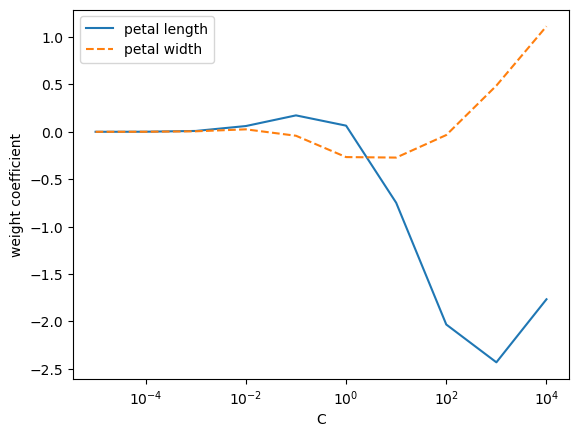

In [14]:
weights, params = [], []
for c in np.arange(-5, 5):
    lr = LogisticRegression(C=10.**c, random_state=1)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10.**c)
weights = np.array(weights)
plt.plot(params, weights[:, 0],
    label='petal length')
plt.plot(params, weights[:, 1], linestyle='--',

label='petal width')
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.legend(loc='upper left')
plt.xscale('log')
#plt.savefig('images/03_08.png', dpi=300)
plt.show()

SVM (Support Vector Machine)

C:\Users\cmoya\AppData\Local\Temp\ipykernel_13892\1335193270.py:21: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],y=X[y == cl, 1],alpha=0.8,c=colors[idx], marker=markers[idx],label=cl,edgecolor='black')


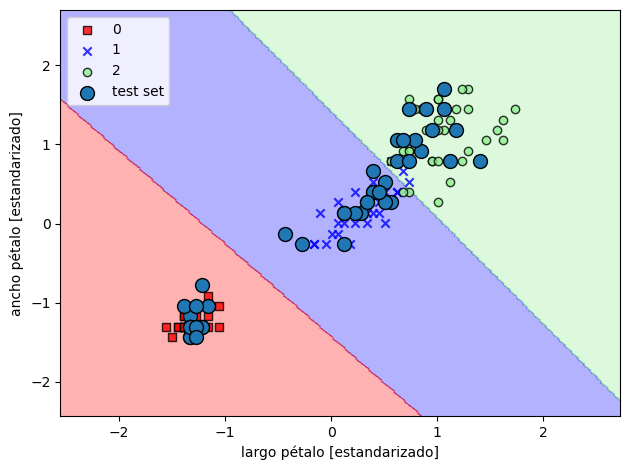

In [15]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', C=100., random_state=1)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std,y_combined,classifier=svm,test_idx=range(105,150))
plt.xlabel('largo pétalo [estandarizado]')
plt.ylabel('ancho pétalo [estandarizado]')
plt.legend(loc='upper left')
plt.tight_layout()
#plt.savefig('images/03_11.png', dpi=300)
plt.show()
